In [4]:
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data Çfiles

## Data processing

In [5]:
os.getcwd()

'C:\\Users\\david\\OneDrive\\Documentos\\GitHub\\OpenBrains\\Diana_analysis'

In [6]:
#Load data and get sheet names
#filepath = 'C:\\Users\\david\\Documents\\Open Brains\\Balanced Brains\\diana_results\\test_feedback_f2.xlsx'
filepath = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\Feedback experiment 6.xlsx'
filepath = 'C:\\Users\\david\\Downloads\\Feedback experiment.xlsx'
xl = pd.ExcelFile(filepath)
sheet_names = xl.sheet_names
print(sheet_names)

['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10']


In [7]:
#Get summary dataframe

summary=[]

for idx, group in enumerate(sheet_names):
    
    df_gx = pd.read_excel(filepath, sheet_name=sheet_names[idx])
    
    if not df_gx.iloc[:,1].isnull().iloc[1]:
        
        for idx1, label in enumerate(['càstig', 'recompensa', 'guiatge']): ##each feedback type
            
            points = df_gx.iloc[1:, 1+idx1][~df_gx.iloc[1:, 1+idx1].isnull()].values ## remove the nan and convert to array
            
            print([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ]) ##control mechanism
            
            summary.append([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ])
            #
            
#
df = pd.DataFrame(summary)
df.columns=['sum', 'mean_points', '#thorws', 'feedback_type', 'group' ]    
            

[500, 55.56, 9, 'càstig', 'G01']
[0, 0.0, 11, 'recompensa', 'G01']
[480, 43.64, 11, 'guiatge', 'G01']
[0, 0.0, 18, 'càstig', 'G02']
[410, 22.78, 18, 'recompensa', 'G02']
[500, 35.71, 14, 'guiatge', 'G02']
[280, 23.33, 12, 'càstig', 'G04']
[830, 27.67, 30, 'recompensa', 'G04']
[750, 34.09, 22, 'guiatge', 'G04']
[450, 32.14, 14, 'càstig', 'G06']
[350, 21.88, 16, 'recompensa', 'G06']
[390, 20.53, 19, 'guiatge', 'G06']


In [8]:
df

,sum,mean_points,#thorws,feedback_type,group
0,500,55.56,9,càstig,G01
1,0,0.00,11,recompensa,G01
2,480,43.64,11,guiatge,G01
3,0,0.00,18,càstig,G02
4,410,22.78,18,recompensa,G02
5,500,35.71,14,guiatge,G02
6,280,23.33,12,càstig,G04
7,830,27.67,30,recompensa,G04
8,750,34.09,22,guiatge,G04
9,450,32.14,14,càstig,G06


## Plots

In [9]:
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns
sns.set_context("talk")

In [10]:
c_guiatge =  '#e59500'
c_recompensa= 'aquamarine' # '#002642'
c_castig= 'indianred'  # '#840032'

C:\Users\david\AppData\Local\Temp\ipykernel_16948\1305034939.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


Text(0.5, 1.0, 'Eficiència')

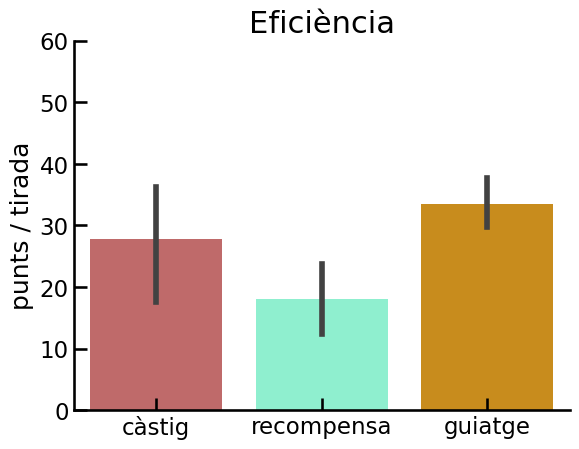

In [11]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,60)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_16948\892595583.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="sum",
C:\Users\david\AppData\Local\Temp\ipykernel_16948\892595583.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="#thorws",
C:\Users\david\AppData\Local\Temp\ipykernel_16948\892595583.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


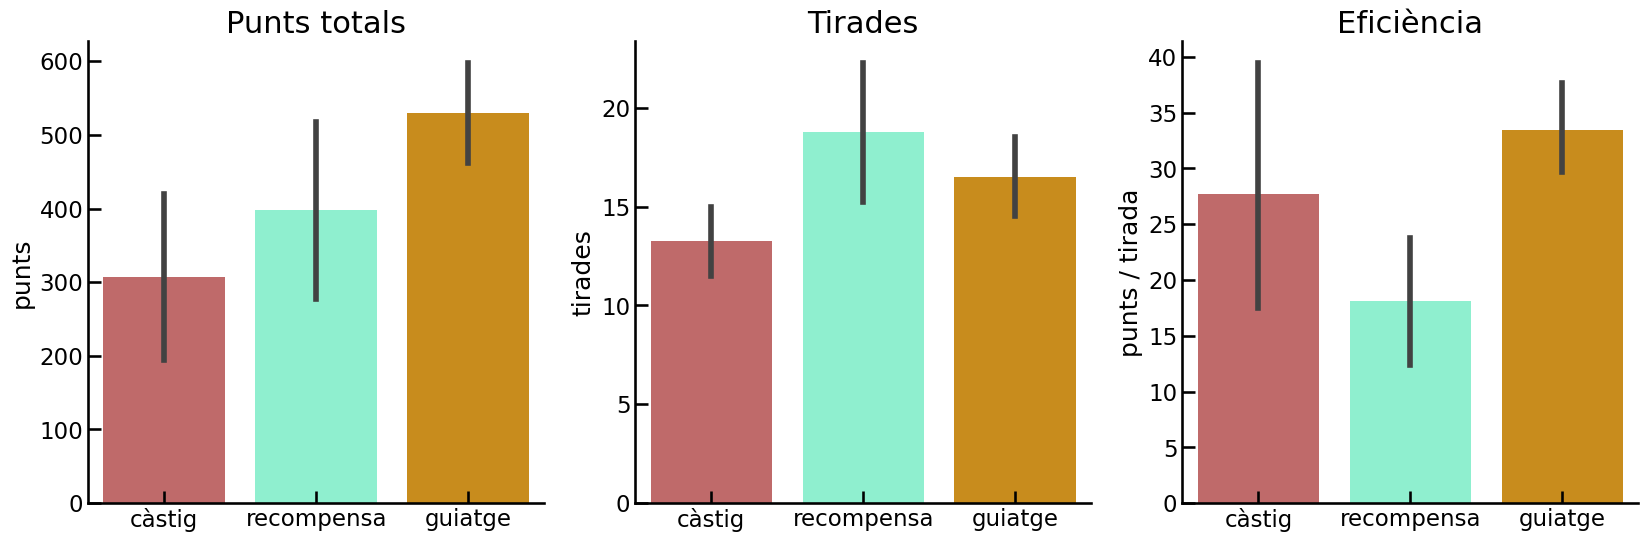

In [12]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Punts totals', fontsize=22)


plt.subplot(132)
sns.barplot(data=df, x="feedback_type", y="#thorws", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('tirades');
plt.title('Tirades', fontsize=22)


plt.subplot(133)
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


In [13]:
from linares_plot import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


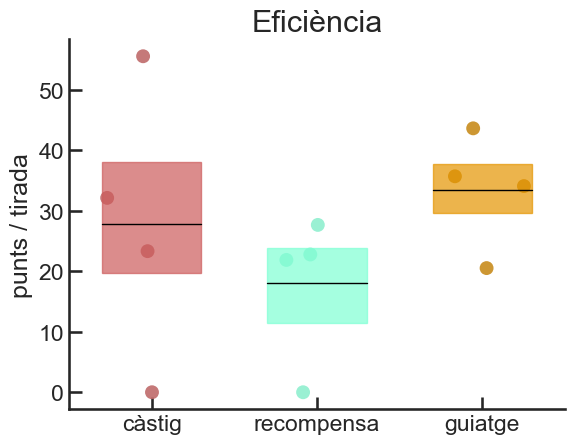

In [14]:
sns.set_context("talk")

linares_plot(x='feedback_type', y='mean_points', order=['càstig', 'recompensa', 'guiatge'], 
             df=df, palette=[c_castig, c_recompensa, c_guiatge], CI=0.68,  fill_box=True, by_subj=True, subj_col='group', 
             reps=500, alpha_box=0.7, alpha=0.9,  point_size=10, leg=False, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


## Stats

In [15]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [16]:
###### Anova model
mod = ols(formula='mean_points ~ feedback_type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['mean_points'].values, groups=df['feedback_type'].values,  alpha=0.05)
print( tukey.summary()    )



                                 
                                 Anova Table
                    sum_sq   df         F    PR(>F)
feedback_type   485.285267  2.0  0.943758  0.424533
Residual       2313.923825  9.0       NaN       NaN
                                 
                                 
                                 
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
 càstig    guiatge    5.735 0.8704 -25.9209 37.3909  False
 càstig recompensa   -9.675 0.6812 -41.3309 21.9809  False
guiatge recompensa   -15.41 0.4005 -47.0659 16.2459  False
----------------------------------------------------------
